# Global ECMWF Fire Forecasting - ERA-Interim based reanalysis of the Fire Weather Index
#### Programming language: R

In [2]:
library("raster")
library("caliver")

In [9]:
portugal <- raster::getData(name = "GADM", country = "PT", level = 0)

In [5]:
# Get FWI reanalysis from Zenodo and load it
fwi <- raster::brick("fwi.nc")
fwi

class       : RasterBrick 
dimensions  : 256, 512, 131072, 14061  (nrow, ncol, ncell, nlayers)
resolution  : 0.703125, 0.7016692  (x, y)
extent      : -180.3516, 179.6484, -89.81366, 89.81366  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : /home/claudia/Dropbox/FireForecasting_paper/fwi.nc 
names       : X1980.01.01, X1980.01.02, X1980.01.03, X1980.01.04, X1980.01.05, X1980.01.06, X1980.01.07, X1980.01.08, X1980.01.09, X1980.01.10, X1980.01.11, X1980.01.12, X1980.01.13, X1980.01.14, X1980.01.15, ... 
Date        : 1980-01-01, 2018-06-30 (min, max)
varname     : fwi 


In [6]:
# Crop over Portugal
fwipt <- caliver::mask_crop_subset(r = fwi, p = portugal, mask = TRUE, crop = TRUE, accurate = TRUE)
fwipt

  |======================================================================| 100%



class       : RasterBrick 
dimensions  : 15, 36, 540, 14061  (nrow, ncol, ncell, nlayers)
resolution  : 0.703125, 0.7016692  (x, y)
extent      : -31.28906, -5.976562, 32.27678, 42.80182  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : /tmp/RtmpMDkjwr/raster/r_tmp_2019-06-17_093428_5223_06997.grd 
names       :  X1980.01.01,  X1980.01.02,  X1980.01.03,  X1980.01.04,  X1980.01.05,  X1980.01.06,  X1980.01.07,  X1980.01.08,  X1980.01.09,  X1980.01.10,  X1980.01.11,  X1980.01.12,  X1980.01.13,  X1980.01.14,  X1980.01.15, ... 
min values  : 1.122959e-06, 1.348004e-04, 6.814867e-03, 4.576752e-02, 3.205727e-03, 4.960350e-02, 1.143807e-01, 1.320496e-04, 7.088614e-05, 8.890392e-02, 0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00, ... 
max values  :   10.4439125,   10.3244667,   10.8701286,    7.4248590,    6.9850869,   13.1251888,   17.3591347,    9.0467491,   10.2736359,   21.2625637,   23.1500645,   28.1514416, 

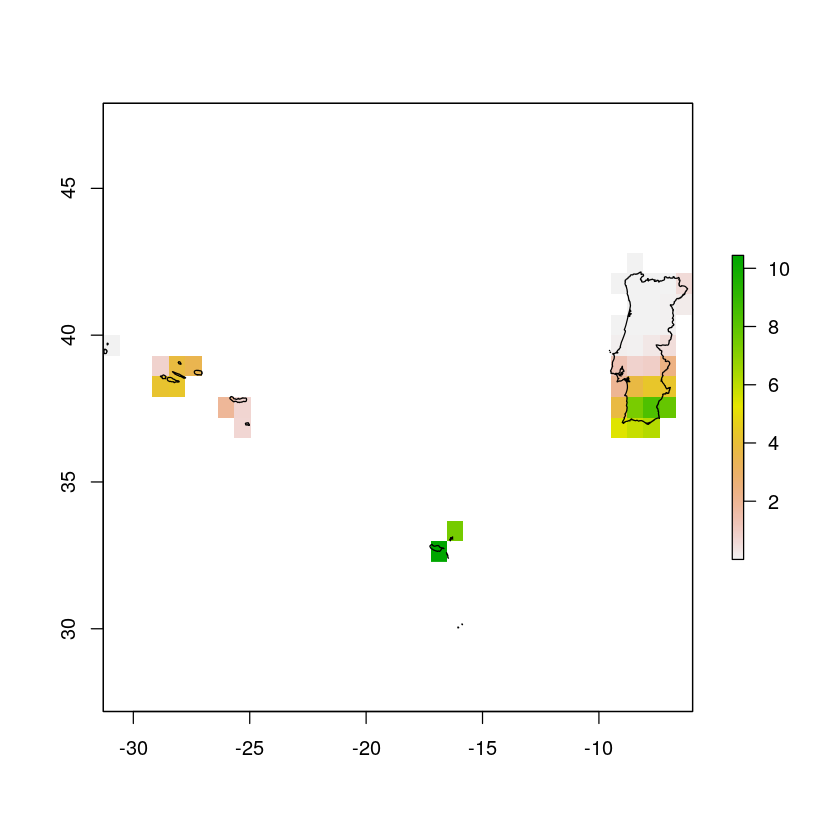

In [8]:
# Check coverage
plot(fwipt[[1]])
plot(portugal, add = TRUE)